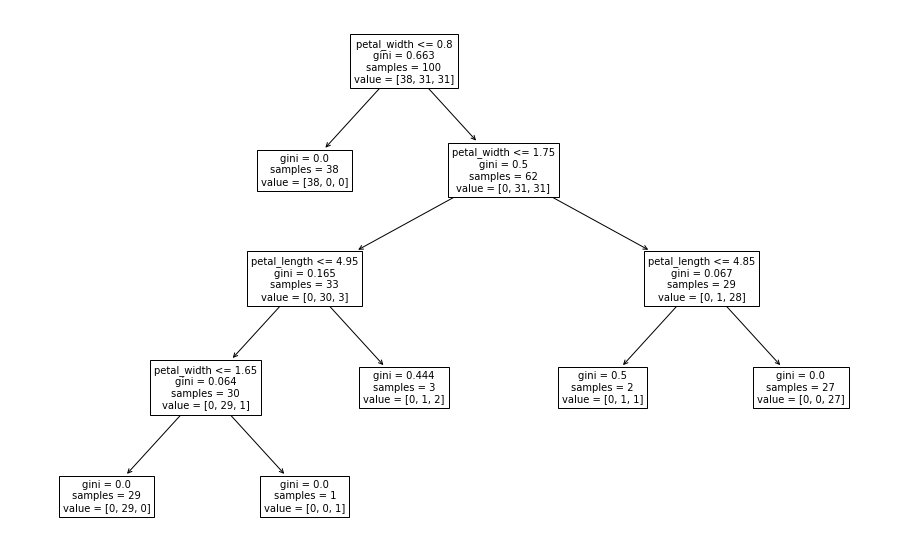

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('axes', unicode_minus = False)

df = pd.read_csv('./data/IRIS.csv')

df.head()

df['id'] = range(len(df))

df.head()

df = df[['id','sepal_length','sepal_width','petal_length','petal_width','species']]

df.head()

train = df.sample(100, replace = False, random_state = 2020)

train = train.reset_index().drop('index', axis = 1)

test = df.loc[~df['id'].isin(train['id'])]

test = test.reset_index().drop('index', axis = 1)

train

test

from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_split = 10)

model.fit(train[['sepal_length','sepal_width','petal_length','petal_width']], train['species'])

pred = model.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])

test['pred'] = pred

(test['species'] == test['pred']).mean()

from sklearn import tree

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

a = tree.plot_tree(model, feature_names = ['sepal_length','sepal_width','petal_length','petal_width'], 
                  fontsize = 10, max_depth = 8)
plt.show(a)

In [2]:
from sklearn.model_selection import cross_val_score

In [7]:
np.mean(cross_val_score(model, df[['id','sepal_length','sepal_width','petal_length','petal_width']],
                        df['species'], cv = 5))

0.9333333333333333

In [12]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [13]:
knn.fit(train[['sepal_length','sepal_width','petal_length','petal_width']], train['species'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
pred_knn = knn.predict(test[['sepal_length','sepal_width','petal_length','petal_width']])

In [17]:
from sklearn.model_selection import cross_val_score

In [27]:
for k in range(1, 30):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    print(np.mean(cross_val_score(knn, df[['id','sepal_length','sepal_width','petal_length','petal_width']],
                        df['species'], cv = 5)))

0.8733333333333333
0.8799999999999999
0.8733333333333333
0.8799999999999999
0.8733333333333333
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8799999999999999
0.8666666666666666
0.8733333333333333
0.8666666666666666
0.8799999999999999
0.8666666666666666
